**SoM-2024**

**WEEK 4 GRADED ASSIGNMENT**

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score,  classification_report,roc_curve, auc
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# DataSet - Adult


In [ ]:
#The Adult dataset, also known as the Census Income dataset, is a multivariate social science dataset that was extracted from the 1994 US Census database by Barry Becker and Ronny Kohavi.
#The dataset contains 48,842 instances and 14 features, including categorical, ordinal, and numerical data types:
#Age: Integer
#Workclass : Categorical
#Education : Categorical
#Married-civ-spouse : Categorical
#Occupation : Categorical
#Relationship : Categorical
#Final Weight : An estimate of the number of people in the population with the same demographics as the individual
#Education Number of Years : A numeric form of the highest level of education achieved
#Hours-per-week : Number of hours worked per week
#Capital-gain : Capital gain in the previous year
#Capital-loss : Capital loss in the previous year
#Native-country : Country of origin

## **Import Data**

In [4]:
census = pd.read_csv('/content/drive/MyDrive/adult.csv')
census.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


## **Analyse Given Dataset**

In [ ]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
census.shape

(48842, 15)

In [ ]:
census[census.occupation == '?'].occupation.count()

2809

In [ ]:
census[census.workclass == '?'].workclass.count()

2799

In [25]:
census.replace('?', np.nan ,inplace = True)

Missing Values

<Axes: >

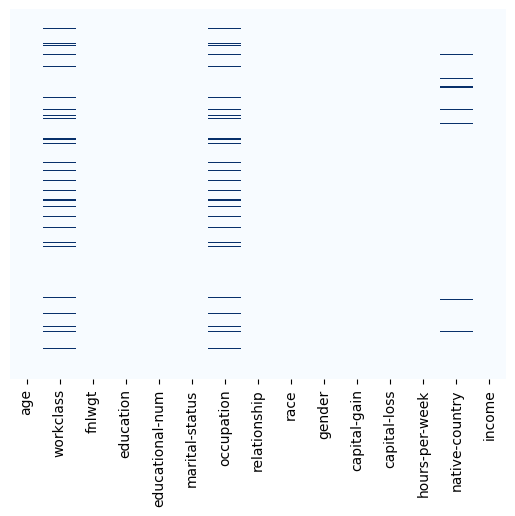

In [26]:
sns.heatmap(census.isnull(), cmap = "Blues", cbar = False, yticklabels= False, xticklabels = census.columns)

In [ ]:
census.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [ ]:
census.groupby(census.workclass).income.value_counts()

workclass         income
Federal-gov       <=50K       871
                  >50K        561
Local-gov         <=50K      2209
                  >50K        927
Never-worked      <=50K        10
Private           <=50K     26519
                  >50K       7387
Self-emp-inc      >50K        938
                  <=50K       757
Self-emp-not-inc  <=50K      2785
                  >50K       1077
State-gov         <=50K      1451
                  >50K        530
Without-pay       <=50K        19
                  >50K          2
Name: count, dtype: int64

In [ ]:
census['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

In [ ]:
census.groupby(census.race).income.value_counts()

race                income
Amer-Indian-Eskimo  <=50K       415
                    >50K         55
Asian-Pac-Islander  <=50K      1110
                    >50K        409
Black               <=50K      4119
                    >50K        566
Other               <=50K       356
                    >50K         50
White               <=50K     31155
                    >50K      10607
Name: count, dtype: int64

In [ ]:
census.groupby(census.gender).income.value_counts()

gender  income
Female  <=50K     14423
        >50K       1769
Male    <=50K     22732
        >50K       9918
Name: count, dtype: int64

In [ ]:
census.groupby(census.relationship).income.value_counts()

relationship    income
Husband         <=50K     10870
                >50K       8846
Not-in-family   <=50K     11307
                >50K       1276
Other-relative  <=50K      1454
                >50K         52
Own-child       <=50K      7470
                >50K        111
Unmarried       <=50K      4816
                >50K        309
Wife            <=50K      1238
                >50K       1093
Name: count, dtype: int64

In [ ]:
census.groupby(census['educational-num']).income.value_counts()

educational-num  income
1                <=50K        82
                 >50K          1
2                <=50K       239
                 >50K          8
3                <=50K       482
                 >50K         27
4                <=50K       893
                 >50K         62
5                <=50K       715
                 >50K         41
6                <=50K      1302
                 >50K         87
7                <=50K      1720
                 >50K         92
8                <=50K       609
                 >50K         48
9                <=50K     13281
                 >50K       2503
10               <=50K      8815
                 >50K       2063
11               <=50K      1539
                 >50K        522
12               <=50K      1188
                 >50K        413
13               <=50K      4712
                 >50K       3313
14               >50K       1459
                 <=50K      1198
15               >50K        617
                 <=

## **Create a new dataset**

In [5]:
censusIncome = census.drop(columns = ['race', 'relationship', 'gender','fnlwgt','education',	'marital-status',	'native-country', 'occupation'])
censusIncome

,age,workclass,educational-num,capital-gain,capital-loss,hours-per-week,income
0,25,Private,7,0,0,40,<=50K
1,38,Private,9,0,0,50,<=50K
2,28,Local-gov,12,0,0,40,>50K
3,44,Private,10,7688,0,40,>50K
4,18,?,10,0,0,30,<=50K
...,...,...,...,...,...,...,...
48837,27,Private,12,0,0,38,<=50K
48838,40,Private,9,0,0,40,>50K
48839,58,Private,9,0,0,40,<=50K
48840,22,Private,9,0,0,20,<=50K


## Ordinal Encoding

In [6]:
map_workclass = {np.nan : np.nan, 'Federal-gov' : 1, 'Local-gov' : 2, 'Never-worked' : 3, 'Private' : 4, 'Self-emp-inc' : 5, 'Self-emp-not-inc' : 6, 'State-gov' : 7, 'Without-pay' : 8}
censusIncome['Workclass']= censusIncome['workclass'].map(map_workclass)
censusIncome = censusIncome.drop(columns = ['workclass'])
censusIncome.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,income,Workclass
0,25,7,0,0,40,<=50K,4.0
1,38,9,0,0,50,<=50K,4.0
2,28,12,0,0,40,>50K,2.0
3,44,10,7688,0,40,>50K,4.0
4,18,10,0,0,30,<=50K,NaN


# Multivariate Imputation

In [7]:
features = [col for col in censusIncome.columns if col not in ['income']]
KNN_Imputer = KNNImputer(n_neighbors = 5)
censusIncome[features] = KNN_Imputer.fit_transform(censusIncome[features])

<Axes: >

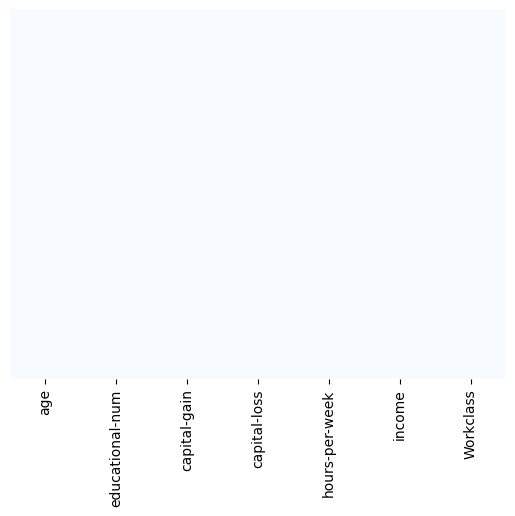

In [ ]:
sns.heatmap(censusIncome.isnull(), cmap = "Blues", cbar = False, yticklabels= False, xticklabels = censusIncome.columns)

In [ ]:
censusIncome['Workclass'] = censusIncome['Workclass'].astype(int)

# Split Training and Testing data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(censusIncome[features], censusIncome['income'], test_size = 0.25)

# Standard Scalar

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
k_values = [i for i in range(20,40)]
scores = []

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors = k)
  score = cross_val_score(knn, X_train, y_train, cv = 5)
  scores.append(np.mean(score))


Text(0, 0.5, 'Accuracy Score')

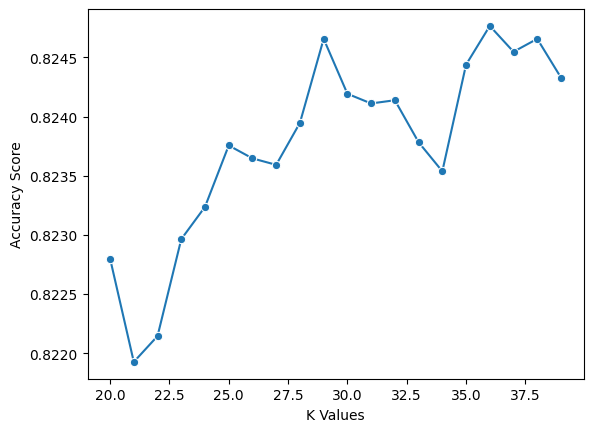

In [ ]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

# KNN Classifier

In [ ]:
best_index = np.argmax(scores)
best_k = k_values[best_index]
knn = KNeighborsClassifier(n_neighbors = best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=36)

In [ ]:
y_pred_knn = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
accuracy

0.8260584718696258

# SVM

In [ ]:
model = SVC()
svc = model.fit(X_train, y_train)
y_pred_svc = model.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_svc

0.82515764474654

Hyperparameter Tuning

In [ ]:
kernels = list(['rbf'])
c = list([ 0.1, 1, 10])
gammas = list([0.1, 1, 10])

clf = SVC()
clf.fit(X_train, y_train)
param_grid = dict(kernel = kernels, C = c, gamma = gammas)
grid = RandomizedSearchCV(clf, param_grid, cv=5)
grid.fit(X_train, y_train)
grid.best_params_

{'kernel': 'rbf', 'gamma': 1, 'C': 1}

Implementation of SVM with better parameter

In [ ]:
model = SVC(kernel = 'rbf', C = 1, gamma = 1)
svc = model.fit(X_train, y_train)
y_pred_svc = model.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_svc

0.8303988207354025

# Random Forest Classifier

In [21]:
classifier_rf = RandomForestClassifier(random_state = 42, n_jobs = -1, n_estimators = 100, oob_score = True)
classifier_rf.fit(X_train, y_train)
classifier_rf.oob_score_

0.8212443012748765

In [22]:
y_pred_rf = classifier_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
accuracy

0.8245843911227582

Hyperparameter Tuning

In [17]:
params = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
}


grid_search = GridSearchCV(estimator = RandomForestClassifier(random_state=42), param_grid = params, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [18]:
grid_search.best_params_

{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}

Implementation of Random Forest with better parameter

In [19]:
classifier_rf = RandomForestClassifier(random_state = 42, n_jobs = -1, n_estimators = 500, max_depth = 8,max_features = 'auto', oob_score = True)
classifier_rf.fit(X_train, y_train)
classifier_rf.oob_score_

0.8369140891594551

In [20]:
y_pred_rf = classifier_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
accuracy

0.8372778642207845